In [3]:
# !pip install --upgrade git+https://github.com/fastai/fastai.git
# !pip install gradio

In [4]:
import torch
import fastai
import gradio as gr
from fastai.vision.all import *

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
path = untar_data(URLs.MNIST)
path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/testing'),Path('/root/.fastai/data/mnist_png/training')]

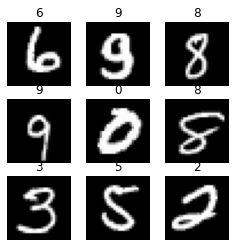

In [7]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=GrandparentSplitter(train_name='training', valid_name='testing'),
                   get_y=parent_label)

dls = dblock.dataloaders(path, batch_size=64, num_workers=0)
dls.show_batch(max_n=9, figsize=(4,4))

torch.Size([3, 28, 28])
TensorCategory(7, device='cuda:0')


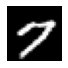

In [8]:
random_sample = next(iter(dls[1]))
x = random_sample[0][0]
y = random_sample[1][0]

print(x.shape)
print(y)
show_image(x)

In [9]:
learner = cnn_learner(dls, resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0020892962347716093)

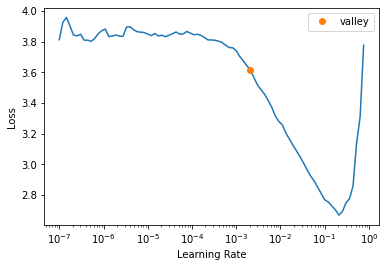

In [10]:
learner.lr_find()

In [11]:
learner.fine_tune(5, base_lr=0.2)

epoch,train_loss,valid_loss,accuracy,time
0,5.565740,6.567299,0.891200,02:30


epoch,train_loss,valid_loss,accuracy,time
0,0.775823,35.284721,0.947900,02:46
1,1.319077,0.754263,0.978000,02:47
2,0.395403,0.305859,0.985200,02:47
3,0.144643,0.067906,0.993100,02:46
4,0.027237,0.041245,0.994000,02:46


[('2', '7', 7), ('6', '0', 6), ('9', '4', 6), ('5', '3', 5)]

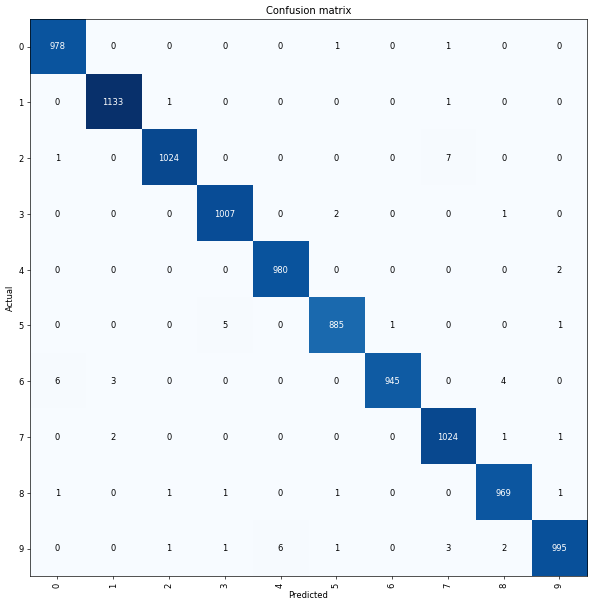

In [12]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)
interp.most_confused(min_val=5)

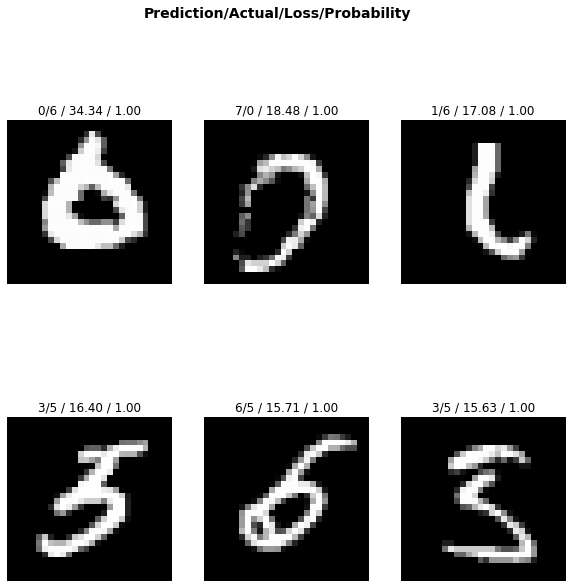

In [13]:
interp.plot_top_losses(6, figsize=(10,10))

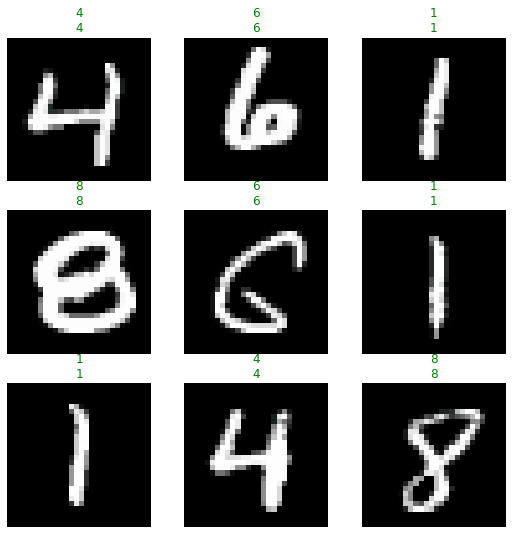

In [14]:
learner.show_results()

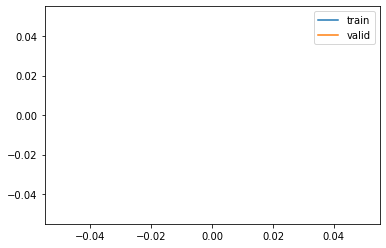

In [15]:
learner.recorder.plot_loss()

In [17]:
labels = learner.dls.vocab

def classify(img):
    pred, pred_idx, probs = learner.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}


interface = gr.Interface(fn=classify, inputs="sketchpad", outputs=gr.outputs.Label(num_top_classes = 5), live=True)
interface.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://19269.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.


(<fastapi.applications.FastAPI at 0x7f9b105faa10>,
 'http://127.0.0.1:7860/',
 'https://19269.gradio.app')

In [ ]:
# learner.export()
# learner = load_learner(path/'export.pkl')